In [18]:
import pandas as pd
import numpy as np  

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [19]:
data = pd.read_csv('data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data = data.loc[:, (data != 0).any(axis=0)]

# Scale the Data

In [21]:
data = data/data.max()+1
data

,33,34,35,36,37,38,39,40,41,42,...,768,769,770,771,772,773,774,775,776,777
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Random Centroids Initialization

In [22]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)


In [23]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis = 1)))
    return distances.idxmin(axis=1)

In [24]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x.mean()))).T

In [25]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x = data_2d[:,0], y = data_2d[:,1], c = labels)
    plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1])
    plt.show()

In [26]:
def calculate_sse(data, centroids, labels):
    sse = 0

    for i in range(len(data)):
        
        cluster_center = centroids[labels[i]]
        sse += np.sum((data.iloc[i] - cluster_center) ** 2)
    return sse

In [27]:
max_iterations = 1000
K = 10

centroids = random_centroids(data, K)
old_centroids = pd.DataFrame()
iteration = 1
old_SSE = float('inf')



while True:
    old_centroids = centroids.copy()
    labels = get_labels(data, centroids)
    current_SSE = calculate_sse(data, centroids, labels)       
    print(iteration, 'iteration', current_SSE) 
     
    if current_SSE >= old_SSE:
            break
    
    old_SSE = current_SSE
    print(iteration, 'iteration', old_SSE)

    centroids = new_centroids(data, labels, K)
    #plot_clusters(data, labels, centroids, iteration)
    iteration += 1

1 iteration 961760.5376968225
1 iteration 961760.5376968225
2 iteration 443359.9576907386
2 iteration 443359.9576907386
3 iteration 414111.69250045664
3 iteration 414111.69250045664
4 iteration 406325.9001442373
4 iteration 406325.9001442373
5 iteration 402945.8552831644
5 iteration 402945.8552831644
6 iteration 400720.5078852902
6 iteration 400720.5078852902
7 iteration 398897.98426524946
7 iteration 398897.98426524946
8 iteration 397527.21299911785
8 iteration 397527.21299911785
9 iteration 396500.8493664201
9 iteration 396500.8493664201
10 iteration 395385.7983286925
10 iteration 395385.7983286925
11 iteration 394304.75952676847
11 iteration 394304.75952676847
12 iteration 393527.9738636402
12 iteration 393527.9738636402
13 iteration 393041.630927771
13 iteration 393041.630927771
14 iteration 392745.1053935867
14 iteration 392745.1053935867
15 iteration 392520.9001883227
15 iteration 392520.9001883227
16 iteration 392380.3851406117
16 iteration 392380.3851406117
17 iteration 392292.

In [ ]:
kmeans_euclidean = labels.copy()

In [ ]:
Euclidean_SSE = calculate_sse(data, centroids, labels)
Euclidean_SSE = Euclidean_SSE.round(2)

Euclidean_SSE


389524.56

In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: 1 - (data.dot(x) / (np.linalg.norm(data, axis=1) * np.linalg.norm(x))))
    return distances.idxmin(axis=1)

In [ ]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

def calculate_sse_cosine(data, centroids, labels):
    sse = 0

    for i in range(len(data)):
        cluster_center = centroids[labels[i]]
        
        cosine_sim = cosine_similarity(data.iloc[i], cluster_center)
        
        cosine_distance = 1 - cosine_sim
        
        sse += cosine_distance ** 2

    return sse

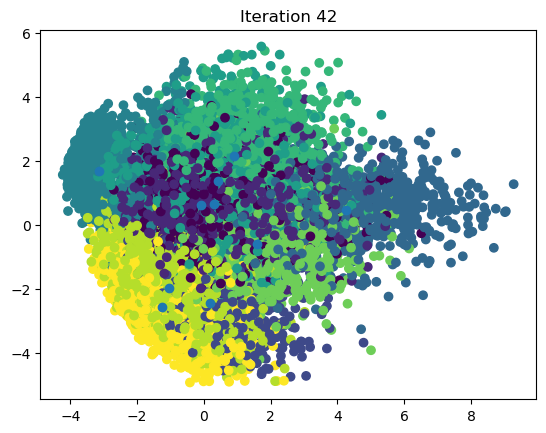

In [ ]:
max_iterations = 1000
K = 10

centroids = random_centroids(data, K)
old_centroids = pd.DataFrame()
iteration = 1
old_SSE = float('inf')


while True:
    old_centroids = centroids.copy()
    labels = get_labels(data, centroids)

    if calculate_sse_cosine(data, centroids, labels) > old_SSE:
            break
    
    old_SSE = calculate_sse(data, centroids, labels).copy()

    centroids = new_centroids(data, labels, K)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
kmeans_cosine = labels.copy()

In [ ]:
Cosine_SSE = calculate_sse_cosine(data, centroids, labels)
Cosine_SSE = Cosine_SSE.round(2)

Cosine_SSE

4.1

In [ ]:
def generalized_jaccard_distance(x, y):
    intersection = np.sum(np.minimum(x, y))
    union = np.sum(np.maximum(x, y))
    
    return 1 - (intersection / union)


def get_labels(data, centroids):
    distances = centroids.apply(lambda centroid: data.apply(lambda point: generalized_jaccard_distance(centroid, point), axis=1))
    return distances.idxmin(axis=1)

In [ ]:
def calculate_sse_jaccard(data, centroids, labels):
    sse = 0

    for i in range(len(data)):
        cluster_center = centroids[labels[i]]
        

        intersection = np.sum(np.minimum(data.iloc[i], cluster_center))
        union = np.sum(np.maximum(data.iloc[i], cluster_center))
        jaccard_distance = 1 - (intersection / union)
        
        sse += jaccard_distance

    return sse


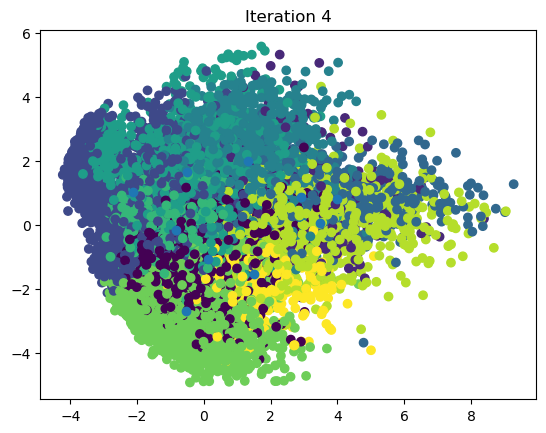

In [ ]:
max_iterations = 1000
K = 10

centroids = random_centroids(data, K)
old_centroids = pd.DataFrame()
iteration = 1
old_SSE = float('inf')


while True:
    old_centroids = centroids.copy()
    labels = get_labels(data, centroids)

    if calculate_sse_jaccard(data, centroids, labels) > old_SSE:
            break
    
    old_SSE = calculate_sse(data, centroids, labels).copy()

    centroids = new_centroids(data, labels, K)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
Jaccard_SSE = calculate_sse_jaccard(data, centroids, labels)
Jaccard_SSE = Jaccard_SSE.round(2)

Jaccard_SSE


In [ ]:
kmeans_jaccard = labels.copy()

In [ ]:
models = pd.DataFrame({
    'Distance': [
        'Euclidean', 'Cosine', 'Jaccard'
    ],
    'SSE': [Euclidean_SSE, Cosine_SSE, Jaccard_SSE]})
models.sort_values(by='SSE', ascending=True)

In [ ]:
from sklearn.metrics import accuracy_score 

true_labels = pd.read_csv('label.csv', header=None)[0]
def majority_vote_labels(labels, true_labels):
    unique_clusters = set(labels)
    cluster_majority_votes = {cluster: max(set(true_labels[labels == cluster]), key=list(true_labels[labels == cluster]).count)
                              for cluster in unique_clusters}
    return [cluster_majority_votes[label] for label in labels]

labels_euclidean = majority_vote_labels(kmeans_euclidean, true_labels)
labels_cosine = majority_vote_labels(kmeans_cosine, true_labels)
labels_jaccard = majority_vote_labels(kmeans_jaccard, true_labels)

accuracy_euclidean = accuracy_score(true_labels, labels_euclidean)
accuracy_cosine = accuracy_score(true_labels, labels_cosine)
accuracy_jaccard = accuracy_score(true_labels, labels_jaccard)

In [ ]:
print(f"Euclidean-K-means Accuracy: {accuracy_euclidean}")
print(f"Cosine-K-means Accuracy: {accuracy_cosine}")
print(f"Jaccard-K-means Accuracy: {accuracy_jaccard}")